# Notes / Summary
1. ANNs are at the very core of deep learning. They are versatile, powerfule, and scalabel,\
 making them ideal to tackle large and highly complex machine leanring \
 tasks such as classifying billions of images e.g. google images.
 
2. ANNS, 1943, by neurophysiologist Warren McCulloch and mathematician Walter Pitts.
3. First paper "a logical calculus of Ideas Immanenet in Nervous Activity", presented a simplified \
computational model of how biological neurons might work together in animal brains tom perform complex \
computations using propositional logic,
4. This is the first artificial neural network architecture
5. The early success of ANN continued till 1960s, later ANN entered long winter, in 1980 revied due to\
 new architectures later 1990 advanced algorithms like SVM came and again ANN went on hold, noww in 2010\
  it came back again into picture.
6. ANN this time is different, bcz there is now a huge quantity of data avialble, and tremendous increase \
in computing power(moore's law) , and developments in new architecture's as well.

## Logical computations
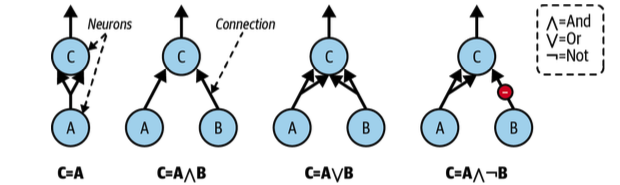

1. first network is identity netowrk
   
2. Second network is AND , both A and B should be high
3. Third network is OR, either A or B should be high
4. Fourth Network is, C will be high if A is high and B is low , this is more complex logical proposition

## The Perceptron
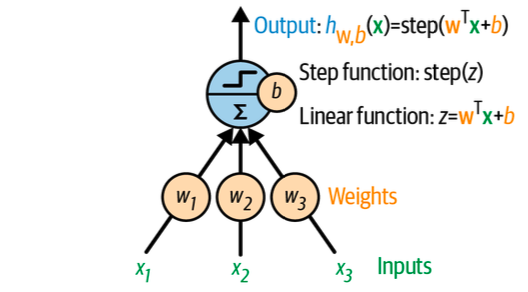

1. The Perceptron is one of the first and simplest ANN by Frank Rosenblatt in 1957
   
2. Also called as TLU-threshold logic unit
3. Also Linear Threshold unit - LTU
4. . It has multiple inputs associated with its own weights and a bias, just like in the linear regression equation
5. The summation is the fed to the step function similar to the sigmoid function in the logistic regression
6. the step function is a binary func, output is high if the above summation is >0 else output is 0
7. The step function if replaced with a sigmoid function then it becomes the logistic regression

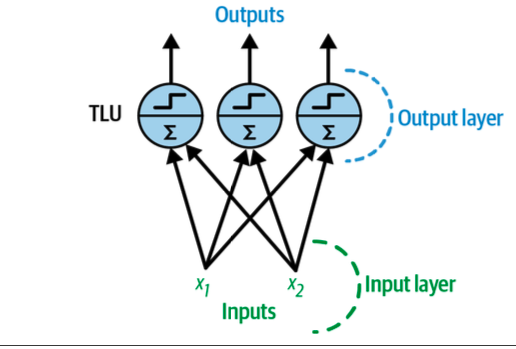

1. the outputs can be multiple classes in case of multi-class clasification
2. here if every TLU is conencted to every input from previous layer then it is \
called a fully connected layer as shown in above fig.

# Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# check for GPU availability
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
# Check for available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Select the GPU you want to use (e.g., the first GPU)
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e, 'error')

    # Now you can use the GPU for your TensorFlow operations

    # Example: Create a tensor on the GPU
    with tf.device('/GPU:0'):  # Specify the GPU device (e.g., '/GPU:0' for the first GPU)
        a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
        print(a.device) 

In [4]:
RS = 143 # RANDOM STATE

# Perceptron

In [5]:
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris.target == 0 ## only iris setosa

In [7]:
per_clfier = Perceptron(random_state=RS)
per_clfier.fit(x, y)

x_new = [[2,0.5], [3,1]] ## two flower data 
y_new = per_clfier.predict(x_new)
y_new ## predicts true or  false for two flowers data

array([ True, False])

* this perceptron learning algo. strongly resembles stochastic gradient descent\
in fact, scikit-learn's perceptron  class is equivalent to using a SGDClassifier\
with some default parameters 
1. with a simple perceptron, we can't learn the exculsive or / XOR function(classification prob)
   
2. this problem overcomed by stacking multiple layers of perceptron -  MLP
3. MLP is another new architecture in ANN

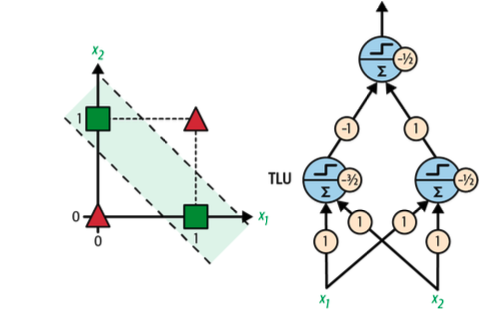

* use logistic regression classififer if you need outputs in probabilites
  
* since perceptron here give 1 or 0

# Multilayer perceptron and Backpropagation

*  The layers close to the input layer are usually called the lower \
    layers, and the ones close to the outputs are usually called the upper layers.


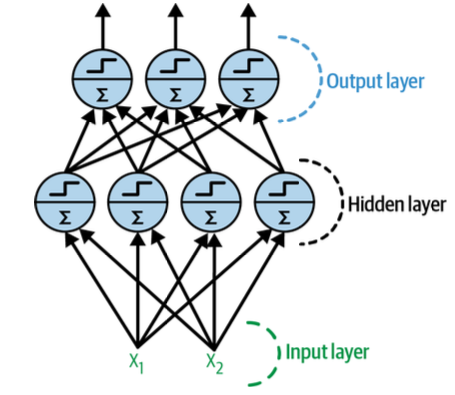

* The signal flows only in one direction (from the inputs to the \
outputs), so this architecture is an example of a **feedforward neural network (FNN).**

* When an ANN contains a deep stack of hidden layers it is called a **deep neural network (DNN).**
* combination of reverse-mode autodiff and gradient descent is now called **backpropagation**

* **chain rule**
*  **random initialization of the weights**
* It is important to initialize all the hidden layers’ connection weights\
randomly, or else training will fail.
* you randomly initialize the weights, you break \
the symmetry and allow backpropagation to train a diverse team of neurons.

* **Step** function was replaced by **Sigmoid** function in the recent years.
* This was essential because the step function contains only flat segments, so there is no gradient to work\
with (gradient descent cannot move on a flat surface), while the sigmoid function\
has a well-defined nonzero derivative everywhere, allowing gradient descent to make\
some progress at every step. 
* **Tan h function** / hyperbolic tangent function :
  * ranges from -1 to 1, S-shaped, continuous, and differentiable.
  * That range tends to make each layer’s output more or less centered around 0 \
     at the beginning of training, which often helps speed up convergence.
* **RELU** function - rectified linear unit function:
  * The ReLU function is continuous but unfortunately not differentiable at z = 0\
    (the slope changes abruptly, which can make gradient descent bounce around),\
    and its derivative is 0 for z < 0. In practice, however, it works very well and\
    has the advantage of being fast to compute, so it has become the default.11\
    Importantly, the fact that it does not have a maximum output value helps reduce\
    some issues during gradient descent

* Why do we need activation functions in the first place? Well, \
if you chain several linear transformations, all you get is a linear transformation. For\
example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions\
gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t\
have some nonlinearity between layers, then even a deep stack of layers is equivalent\
to a single layer, and you can’t solve very complex problems with that.\

* Biological neurons seem to implement a **roughly sigmoid (S-shaped) activation function**, so researchers stuck\
to sigmoid functions for a very long time. But it turns out that ReLU generally works better in ANNs. This is\
one of the cases where the biological analogy was perhaps **misleading**.

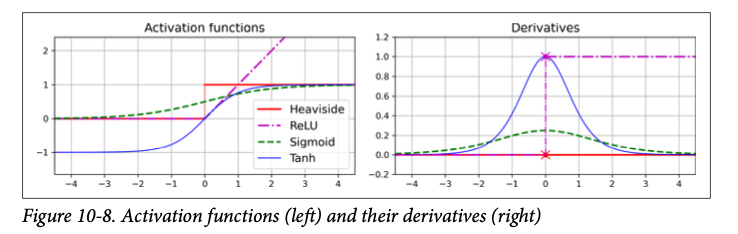

# Regression MLPs
* For multivariate regression (i.e., to \
    predict multiple values at once), you need one output neuron per output dimension. \
    For example, to locate the center of an object in an image, you need to predict 2D \
    coordinates, so you need **two output neurons. **
    
* **standardize** the input features before sending
them to the MLPRegressor. This is very important for neural networks because they\
are trained using gradient descent, **gradient** descent\
**does not converge very well** when the features have very different scales. 

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing =  fetch_california_housing()
x_train_full, x_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=RS
)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50,50,50], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_reg
)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)

rmse = mean_squared_error(y_valid, y_pred=y_pred)#, squared=False)
rmse

0.28201622689101963

* if you want to guarantee
that the output will always be positive, then you should use the ReLU activation\
function in the output layer, or the softplus activation function, which is a smooth\
variant of ReLU: softplus(z) = log(1 + exp(z)). 

*  MLPRegressor : uses the mean squared error, which is usually what you want\
for regression, but if you have a lot of outliers in the training set, you may prefer to\
use the mean absolute error instead

* 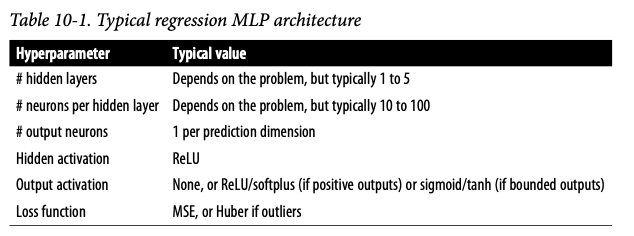

# Classification MLPs
* for binary classificaiton problem, need a single output neuron using the sigmoid activation function
* 
* MLPs also can easily handle **multilable binary classsification**tasks, 
  * you need two output neurons, both using the sigmoid activation function, 
  * first output neuron for spam or not , second is for urgnet or not
* if **multi class classification**, you should use the softmax activation function for the\
whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they\
add up to 1, since the classes are exclusive
* Cross entropy loss is generally a good choice

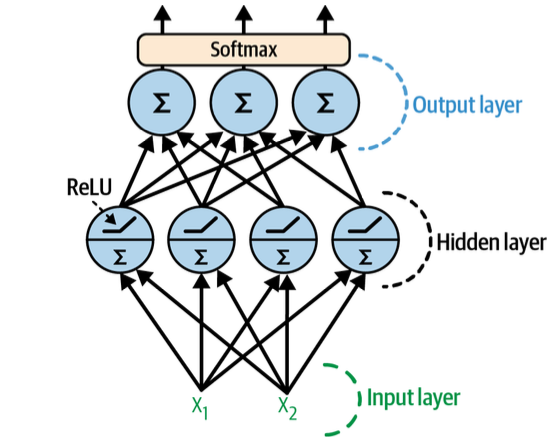

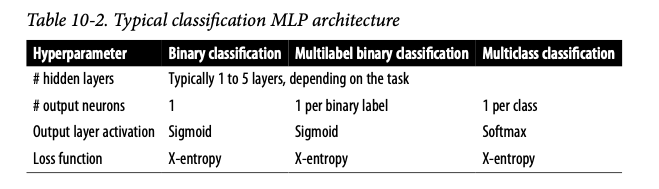

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing =  fetch_california_housing()
x_train_full, x_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=RS
)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50,50,50], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_reg
)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)

rmse = mean_squared_error(y_valid, y_pred=y_pred)#, squared=False)
rmse

0.28201622689101963

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.datasets import load_iris

iris_data = load_iris()
x_train_full, x_test, y_train_full, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=RS)


mlp_clasfr = MLPClassifier(
    hidden_layer_sizes=[10], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_clasfr
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)
y_pred

# logloss = log_loss(y_valid, y_pred)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1,
       1, 0])

# Implementing MLPs with Keras

* **Keras is TensorFlow’s **high-level deep learning API:

* released in March 2015
* When loading **MNIST or Fashion MNIST** using Keras rather than Scikit-Learn, one\
important difference is that every image is represented as a 28 × 28 array rather than\
a 1D array of size 784. 
* a **Sequential model.** This is the simplest kind of Keras\
model for neural networks that are just composed of a single stack of layers\
connected sequentially. This is called the sequential API.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the\
    **softmax activation** function because the classes are exclusive.
* Specifying activation="relu" is equivalent to specifying activation=tf.keras.activations.relu.

In [11]:
import tensorflow as tf 

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]
x_train.shape

(55000, 28, 28)

In [12]:
x_train.dtype

dtype('uint8')

In [13]:
##For simplicity, scale pixel intensities down to the 0-1 range by dividng them bny 255
x_train, x_valid, x_test = x_train/255, x_valid/255, x_test/255


In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [15]:
tf.random.set_seed(RS)
model  = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [16]:
## inplace of above , we can pass a list of layers as below

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)  
    
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## summary

In [17]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

* Dense layers often have a lot of parameters. For example, the first hidden\
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to\
235,500 parameters! This gives the model quite a lot of flexibility to fit the training\
data, but it also means that the model runs the risk of overfitting, especially when you\
do not have a lot of training data.

* All global state managed by Keras is stored in a Keras session,\
which you can clear using tf.keras.backend.clear_session().\
In particular, this resets the name counters.
* Dense layer initialized weights randomly, 
  * if you want to use a different initialization method, you can set
kernel_initializer

In [18]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [19]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense_3, built=True>

In [20]:
model.get_layer('dense_3') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[ 2.9782102e-02, -6.1538786e-02, -4.9488612e-02, ...,
         1.2902446e-02,  5.7774499e-02,  2.8723098e-02],
       [ 1.6548261e-02, -6.9949739e-02,  9.2432275e-03, ...,
         5.1818565e-02, -4.9270846e-02,  8.7953657e-03],
       [-5.7829857e-02,  1.5959404e-02, -6.3348331e-02, ...,
         3.6726691e-02,  5.4443479e-03, -4.8781827e-02],
       ...,
       [ 1.7011113e-02,  4.1111305e-02, -4.8557624e-02, ...,
        -3.2477081e-05, -1.8813390e-02,  4.2613827e-02],
       [-3.7200429e-02,  6.3283220e-02, -5.0751194e-02, ...,
        -3.6546241e-02, -3.7569698e-02,  3.4033246e-02],
       [-4.1720886e-02,  3.7990957e-03,  5.9063137e-02, ...,
         5.0155818e-02,  5.7132840e-02,  5.5532664e-02]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

## compiling the model

In [25]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## training and evaluating the model

In [26]:
history = model.fit(
    x_train, y_train, epochs=30,
    validation_data=(x_valid, y_valid)
)
history

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.6977 - loss: 0.9556 - val_accuracy: 0.8150 - val_loss: 0.5165
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8272 - loss: 0.4960 - val_accuracy: 0.8372 - val_loss: 0.4503
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8461 - loss: 0.4408 - val_accuracy: 0.8542 - val_loss: 0.4160
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8557 - loss: 0.4104 - val_accuracy: 0.8604 - val_loss: 0.3965
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8617 - loss: 0.3895 - val_accuracy: 0.8640 - val_loss: 0.3836
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8678 - loss: 0.3737 - val_accuracy: 0.8658 - val_loss: 0.3755
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8716 - loss: 0.3609 - val_accuracy: 0.8680 - val_loss: 0.3672
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.8755 -

* The fit() method returns a History object containing the training parameters\
(history.params), the list of epochs it went through (history.epoch), and most\
importantly a dictionary (history.history) containing the loss and extra metrics

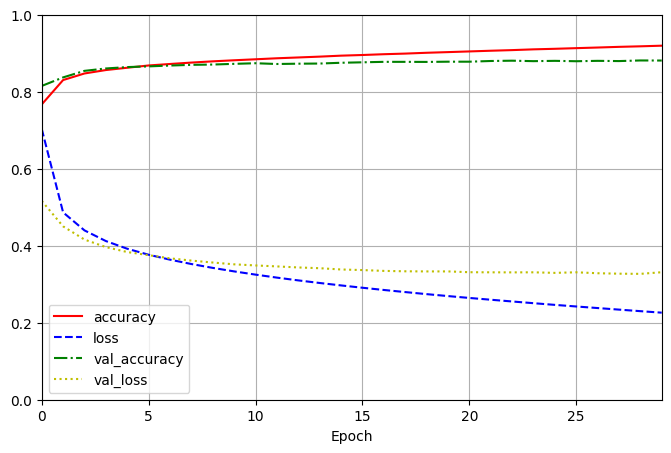

In [27]:
# Plot the training and evaluation loss

import pandas as pd

pd.DataFrame(
    history.history
).plot(figsize=(8,5),
       xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
       style=['r-','b--','g-.','y:'])
plt.show()

* The training set performance ends up beating the validation performance, as is\
generally the case when you train for long enough. You can tell that the model has not\
quite converged yet, as the validation loss is still going down, so you should probably

* If model performance is not satisfactory, then go back    
  * first check the **learning rate**, if this doesnt help
  * then check for **another optimizer**
  * if performance is still not great, 
    * try **tuning model hyperparameters** like
      * number of layers
      * number of neurons per layer
      * types of activation function

In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.8718 - loss: 0.3585


[0.35378944873809814, 0.8734999895095825]

## Using the model to make new predictions

In [29]:
x_new = x_test[:3]
y_proba = model.predict(x_new)                     
y_proba.round(2)
## this will gives the probability of each class for each instance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
## here lets find the actual class for each instance

y_pred = y_proba.argmax(axis=1)
y_pred


array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new
## the above simple model has rightly classified the images with simple dense layers

array([9, 2, 1], dtype=uint8)

# Regression MLP using Sequential API

* California housing problem, tackle this using same MLP as earlier with 3 hiddent layers each 50 neurons

In [33]:

housing =  fetch_california_housing()
x_train_full, x_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=RS)

norm_layer = tf.keras.layers.Normalization(input_shape=x_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

lrate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lrate)

model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(x_train)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

mse_test, rmse_test = model.evaluate(x_test,y_test)
mse_test,rmse_test

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - RootMeanSquaredError: 1.2617 - loss: 1.7105 - val_RootMeanSquaredError: 0.6710 - val_loss: 0.4502
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - RootMeanSquaredError: 0.6459 - loss: 0.4174 - val_RootMeanSquaredError: 0.6441 - val_loss: 0.4149
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - RootMeanSquaredError: 0.6128 - loss: 0.3757 - val_RootMeanSquaredError: 0.6254 - val_loss: 0.3911
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - RootMeanSquaredError: 0.5875 - loss: 0.3453 - val_RootMeanSquaredError: 0.6125 - val_loss: 0.3752
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - RootMeanSquaredError: 0.5730 - loss: 0.3286 - val_RootMeanSquaredError: 0.6072 - val_loss: 0.3686
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - RootMeanSquaredError: 0.5607 - loss: 0.3146 - val_RootMeanSquaredError: 0.6014 - val_loss: 0.3617
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - RootMeanSquaredError: 0.5540 - 

(0.3038593530654907, 0.5512343645095825)

In [34]:
lrate

0.001

* The Normalization layer learns the feature means and standard\
deviations in the training data when you call the adapt() method.\
Yet when you display the model’s summary, these statistics are\
listed as non-trainable. 

* This is because these parameters are not
affected by gradient descent.

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [36]:
## predict for test values in Regression MLP using Keras

x_new = x_test[:3]
y_pred = model.predict(x_new)
y_pred, y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(array([[2.0014923],
        [3.6199782],
        [1.9735069]], dtype=float32),
 array([1.44 , 3.177, 1.458]))

# Complex models using Functional API 



* A non sequential neural network is wide & Deep neural network
* It connects all or part of the inputs directly to the output layer as in fig.
* 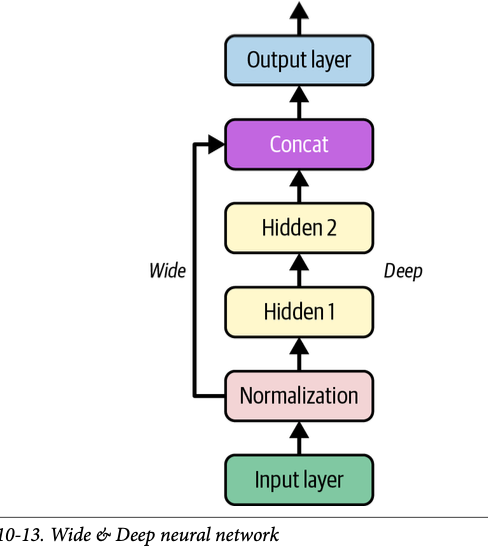
* This architecture makes it possible for the neural network to learn both
  * deep patterns, using the deep path
  * and simple rules, through the short path

In [37]:
# lets build such a wide and deep model using keras functional API

norm_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')

concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = norm_layer(input_)

hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

* Once you have built this Keras model, everything is exactly like earlier, so there’s no\
need to repeat it here: you compile the model, adapt the Normalization layer, fit the\
model, evaluate it, and use it to make predictions.

* But what if you want to send a subset of the features through the wide path and \
a different subset (possibly overlapping) through the deep path, 

* for example, supposewe want to send five features through the wide path (features 0 to 4), \
  and six features through the deep path (features 2 to 7).

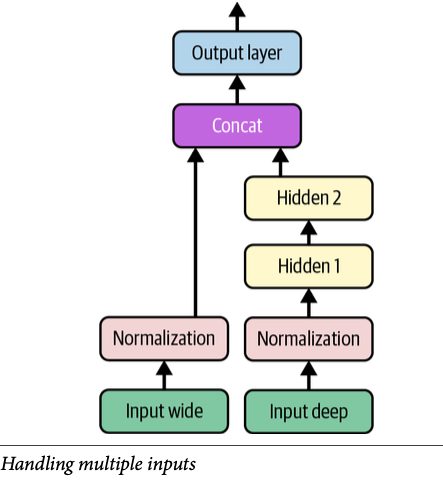

In [38]:
# handling multiple inputs

input_wide= tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])   

norm_layer_wide = tf.keras.layers.Normalization()   
norm_layer_deep = tf.keras.layers.Normalization()   

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep) 

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])   
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 6)         │         13 │ input_layer_5[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        210 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ input_layer_4[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ normalization_2[… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [39]:
# now lets compile the model
## however here, we need to pass pair of matrices when we call fit method
## since we have used two inputs, as shown above fig

optimizer = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

xtrainwide, xtraindeep = x_train[:, :5], x_train[:, 2:]
xvalidwide, xvaliddeep = x_valid[:, :5], x_valid[:, 2:]
xtestwide, xtestdeep = x_test[:, :5], x_test[:, 2:]
xnewwide, xnewdeep = xtestwide[:3], xtestdeep[:3]

norm_layer_wide.adapt(xtrainwide)
norm_layer_deep.adapt(xtraindeep)

history = model.fit((xtrainwide, xtraindeep), y_train, epochs=20,
                    validation_data=((xvalidwide, xvaliddeep), y_valid))
mse_test = model.evaluate((xtestwide, xtestdeep), y_test)
y_pred = model.predict((xnewwide, xnewdeep))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - RootMeanSquaredError: 1.3957 - loss: 1.9950 - val_RootMeanSquaredError: 0.8667 - val_loss: 0.7512
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - RootMeanSquaredError: 0.7931 - loss: 0.6297 - val_RootMeanSquaredError: 0.7085 - val_loss: 0.5020
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - RootMeanSquaredError: 0.6803 - loss: 0.4632 - val_RootMeanSquaredError: 0.6762 - val_loss: 0.4573
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - RootMeanSquaredError: 0.6462 - loss: 0.4178 - val_RootMeanSquaredError: 0.6612 - val_loss: 0.4372
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - RootMeanSquaredError: 0.6288 - loss: 0.3956 - val_RootMeanSquaredError: 0.6651 - val_loss: 0.4424
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - RootMeanSquaredError: 0.6179 - loss: 0.3819 - val_RootMeanSquaredError: 0.6931 - val_loss: 0.4804
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - RootMeanSquaredError

* Instead of passing a tuple (X_train_wide, X_train_deep),\
you can pass a dictionary {"input_wide": X_train_wide,\
"input_deep": X_train_deep}, if you set name="input_wide"\
and name="input_deep" when creating the inputs. This is highly\
recommended when there are many inputs, to clarify the code and|
avoid getting the order wrong.

* Some use cases, may demand to **have multiple outputs**
  * for instance, you may want to locate and classify the main object in a picture
  * this is a **both regression tasks and a classificaiton task**
  * 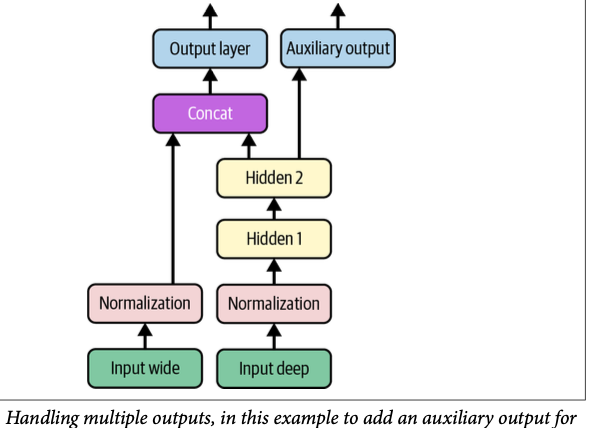

In [40]:
## code is similar to the above

input_wide= tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])   

norm_layer_wide = tf.keras.layers.Normalization()   
norm_layer_deep = tf.keras.layers.Normalization()   

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep) 

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 6)         │         13 │ input_layer_7[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 30)        │        210 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ input_layer_6[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 30)        │        930 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ normalization_4[… │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │         31 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

* if we pass a single loss, Keras will assume that the\
same loss must be used for all outputs. By default, Keras will compute all the losses\
and simply add them up to get the final loss used for training. Since we care much\
more about the main output than about the auxiliary output (as it is just used for\
regularization), we want to give the main output’s loss a much greater weight. Luckily,\
it is possible to set all the loss weights when compiling the model

* Instead of passing a tuple loss=("mse", "mse"), you can pass\
a dictionary loss={"output": "mse", "aux_output": "mse"},\
assuming you created the output layers with name="output" and
name="aux_output".

In [41]:
# lets compile and fit the model

optimizer = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss=['mse','mse'], optimizer=optimizer, metrics=['RootMeanSquaredError','RootMeanSquaredError'],
              loss_weights=(0.9,0.1))

norm_layer_wide.adapt(xtrainwide)
norm_layer_deep.adapt

history = model.fit(
    (xtrainwide, xtraindeep), (y_train, y_train), epochs=20,
    validation_data=((xvalidwide, xvaliddeep), (y_valid, y_valid))
)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - dense_18_RootMeanSquaredError: 54.3534 - dense_18_loss: 4071.9644 - dense_19_RootMeanSquaredError: 46.5469 - dense_19_loss: 2606.5239 - loss: 3925.4231 - val_dense_18_RootMeanSquaredError: 1.4005 - val_dense_18_loss: 1.9613 - val_dense_19_RootMeanSquaredError: 1.5491 - val_dense_19_loss: 2.3993 - val_loss: 2.0053
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - dense_18_RootMeanSquaredError: 1.2938 - dense_18_loss: 1.6762 - dense_19_RootMeanSquaredError: 1.3972 - dense_19_loss: 1.9701 - loss: 1.7056 - val_dense_18_RootMeanSquaredError: 1.1945 - val_dense_18_loss: 1.4267 - val_dense_19_RootMeanSquaredError: 1.3172 - val_dense_19_loss: 1.7350 - val_loss: 1.4576
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - dense_18_RootMeanSquaredError: 1.1221 - dense_18_loss: 1.2594 - dense_19_RootMeanSquaredError: 1.2638 - dense_19_loss: 1.5985 - loss: 1.2933 - val_dense_18_RootMeanSquaredError: 1.0709 - val_dense_18_loss: 1.1469 

In [42]:
## evaluate the model

eval_results = model.evaluate((xtestwide, xtestdeep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(f"Weighted sum of losses: {weighted_sum_of_losses}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - dense_18_RootMeanSquaredError: 2.5704 - dense_18_loss: 6.6302 - dense_19_RootMeanSquaredError: 1.3882 - dense_19_loss: 1.9289 - loss: 6.1602
Weighted sum of losses: 5.546252250671387


In [43]:
## predict the model

y_pred_main, y_pred_aux = model.predict((xnewwide, xnewdeep))
y_pred_main, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[3.0114012],
        [4.0393057],
        [2.2956953]], dtype=float32),
 array([[0.93922114],
        [1.8371665 ],
        [1.3785484 ]], dtype=float32))

In [44]:
## predict does not create modle output names, we can do the following

ypredtuple = model.predict((xnewwide, xnewdeep))
ypred  = dict(zip(model.output_names, ypredtuple))
ypred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


{'dense_18': array([[3.0114012],
        [4.0393057],
        [2.2956953]], dtype=float32),
 'dense_19': array([[0.93922114],
        [1.8371665 ],
        [1.3785484 ]], dtype=float32)}

# Using sub classing API to build Dynamic Models

* the sequential API and the functional API are declarative: you start by declaring\
which layers you want to use and how they should be connected, and only then\
can you start feeding the model some data for training or inference
* Some models invovle loops, varying shapes, conditional branching, and other dynamic  behaviours. 
* For such cases, or simply if you prefer a more imperative programming style, the sublassing API is for you.

In [45]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        ## to call the tf.keras.model __init__
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        self.hidden1 = tf.keras.layers.Dense(units=units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        
        concat = tf.keras.layers.Concatenate([norm_wide, hidden2])
        output = self.main_output(cocnat)
        aux_output = self.aux_output(hidden2)
        
        return output, aux_output
    

In [46]:
model1 = WideAndDeepModel(30, activation='relu', name='my_first_model')
model1

<WideAndDeepModel name=my_first_model, built=False>

* However, thisextra flexibility does come at a cost: your model’s architecture is hidden within the\
call() method, so Keras cannot easily inspect it; 
* the model cannot be cloned using tf.keras.models.clone_model();
*  and when you call the summary() method, you only get a list of layers,
*   without any information on how they are connected to each other.
*   

* **Keras models can be used just like regular layers, so you can easily
combine them to build complex architectures.**


## saving and restoring the model

In [47]:
model.save('my_first_keras_model.keras')

In [48]:
load_model = tf.keras.models.load_model('my_first_keras_model.keras')
ypredmain, y_pred_aux =  load_model.predict((xnewwide, xnewdeep))
ypredmain, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(array([[3.0114012],
        [4.0393057],
        [2.2956953]], dtype=float32),
 array([[0.93922114],
        [1.8371665 ],
        [1.3785484 ]], dtype=float32))

## callbacks

* If you’re training a big model,\
and it takes hours or days, then you must save checkpoints regularly in case the
computer crashes. 

In [53]:
## lets create a checkpoint

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                   save_weights_only=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lrate)
model1.compile(loss=['mse','mse'], optimizer=optimizer, metrics=['RootMeanSquaredError','RootMeanSquaredError'],
              loss_weights=(0.9,0.1))

# history = model1.fit((xtrainwide, xtraindeep), (y_train, y_train), epochs=20,
#     validation_data=((xvalidwide, xvaliddeep), (y_valid, y_valid)),
#     callbacks=[checkpoint_cb   ])


## Early stopping


* Another way is to use the EarlyStopping callback. It will interrupt training when\
it measures no progress on the validation set for a number of epochs 

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

# history = model1.fit((xtrainwide, xtraindeep), (y_train, y_train), epochs=20,
#                      callbacks=[checkpoint_cb, early_stopping_cb])

# Tensor board

* Not much here for now, later with heavy consumption
* this might be useful in future
*  **How many EPOCHS** ? 
   *   it often takes a few batches for the neural network to “warm up”, 
   *   so you don’t want to profile too early,
   *   and profiling uses resources, so it’s best not to do it for every batch.

# Hyper parameters fine tuning 

* The flexibility of neural networks is also one of their main drawbacks: 
* there are **many hyperparameters to tweak**
  * In basic MLP 
    * change number of layers
    * number of neurons
    * type of activaiton function in each layer
    * weight initalization logic
    * type of otpmizer to use
    * learning rate
    * batch size
    * more...


**example**
* MLP to classify Fashion MNIST images, using hyperparameters such as the number of hidden\
layers (n_hidden), the number of neurons per layer (n_neurons), the learning rate \
(learning_rate), and the type of optimizer to use (optimizer)

In [60]:
import keras_tuner as kt

def build_model(hp):
    
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2,
                             sampling='log')
    
    optimizer = hp.Choice('optimizer', values=['adam','sgd'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
        
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model



* the optimizer hyperparameter is registered with two possible values: "sgd"\
or "adam" (the default value is the first one, which is "sgd" in this case).

In [61]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', 
    max_trials=5, overwrite=True, directory='my_fashion_mnist', project_name='my_random_search', seed=42)

random_search_tuner.search(x_train, y_train, epochs=10, 
                           validation_data=(x_valid, y_valid))


Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.0018087854841724038

Best val_accuracy So Far: 0.0018087854841724038
Total elapsed time: 00h 00m 34s


* If you run this code a second time but with overwrite=False and max_trials=10,
*  the tuner will continue tuning where it left off, running 5 more trials: this
*  means you don’t have to run all the trials in one shot. 
*  Each tuner is guided by a so-called oracle: before each trial, 
*  the tuner asks the **oracle** to tell it what the next trial should be.
*   The **RandomSearch tuner** uses a RandomSearch Oracle, which is pretty basic:
*    it just picks the next trial randomly, as we saw earlier.
*    Since the oracle keeps track of all the trials, you can ask it to give you the best one,
*    and you can display a summary of that trial:

* However, Keras Tuner also includes a **kt.BayesianOptimization** tuner:
* this algorithm gradually learns which regions of the hyperparameter space are most
* promising by fitting a probabilistic model called a Gaussian process. 
* This allows it to gradually zoom in on the best hyperparameters.
* The downside is that the algorithm has its **own** hyperparameters